In [211]:
import csv
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import shutil

%matplotlib inline

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 16

from bokeh.charts import Area, show, output_file, defaults
from bokeh.layouts import row

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
raw_data = pd.read_csv('data/DeathRecords/DeathRecords.csv', low_memory=False)

In [3]:
print("Total rows: {0}".format(len(raw_data)))
print(list(raw_data))

Total rows: 2631171
['Id', 'ResidentStatus', 'Education1989Revision', 'Education2003Revision', 'EducationReportingFlag', 'MonthOfDeath', 'Sex', 'AgeType', 'Age', 'AgeSubstitutionFlag', 'AgeRecode52', 'AgeRecode27', 'AgeRecode12', 'InfantAgeRecode22', 'PlaceOfDeathAndDecedentsStatus', 'MaritalStatus', 'DayOfWeekOfDeath', 'CurrentDataYear', 'InjuryAtWork', 'MannerOfDeath', 'MethodOfDisposition', 'Autopsy', 'ActivityCode', 'PlaceOfInjury', 'Icd10Code', 'CauseRecode358', 'CauseRecode113', 'InfantCauseRecode130', 'CauseRecode39', 'NumberOfEntityAxisConditions', 'NumberOfRecordAxisConditions', 'Race', 'BridgedRaceFlag', 'RaceImputationFlag', 'RaceRecode3', 'RaceRecode5', 'HispanicOrigin', 'HispanicOriginRaceRecode']


In [53]:
data = raw_data.filter(['Age', 'CauseRecode39'])
data = data[data.Age < 130]

In [171]:
small_data = data._slice(slice(0,1000)).sort_values(by='Age')

In [111]:
stacked_data_39 = np.zeros([np.max(data.Age), np.max(data.CauseRecode39)])

In [176]:
for idx, row in data.iterrows(): 
    stacked_data_39[row.Age-1][row.CauseRecode39-1] += 1

In [188]:
stacked_data_39[:, 30]

array([   26.,    10.,    18.,     4.,     7.,     5.,     1.,     7.,
           3.,     4.,     6.,     2.,     7.,     3.,     5.,    10.,
           5.,     2.,    10.,    17.,    23.,    15.,    26.,     6.,
          11.,    20.,    20.,    25.,    24.,    33.,    30.,    22.,
          43.,    57.,    47.,    71.,    46.,    70.,    69.,    84.,
          70.,    89.,   120.,   135.,   136.,   145.,   163.,   203.,
         193.,   240.,   291.,   278.,   342.,   383.,   427.,   419.,
         479.,   525.,   546.,   629.,   646.,   726.,   758.,   738.,
         858.,   943.,  1033.,   939.,   959.,   987.,  1165.,  1190.,
        1156.,  1200.,  1250.,  1334.,  1356.,  1390.,  1543.,  1549.,
        1668.,  1722.,  1762.,  1873.,  1807.,  2039.,  1928.,  1900.,
        1845.,  1712.,  1599.,  1470.,  1220.,   916.,   757.,   656.,
         501.,   352.,   307.,   158.,   109.,    94.,    45.,    40.,
          20.,    10.,     7.,     3.,     7.,     0.,     0.,     0.,
      

In [196]:
#Further reduce groupings to  ICD10
stacked_data_20 = np.zeros([np.max(data.Age), 11])
stacked_data_20[:, 0] = np.sum(stacked_data_39[:, :3], axis=1) #infectious diseases
stacked_data_20[:, 1] = np.sum(stacked_data_39[:, 3:15], axis=1) #Cancers
stacked_data_20[:, 2] = stacked_data_39[:, 15] #Diabetes
stacked_data_20[:, 3] = stacked_data_39[:, 16] #Alzheimers
stacked_data_20[:, 4] = np.sum(stacked_data_39[:, 17:26], axis=1) #circulatory system
stacked_data_20[:, 5] = np.sum(stacked_data_39[:, 26:28], axis=1) #respiratory system
stacked_data_20[:, 6] = np.sum(stacked_data_39[:, 28:30], axis=1) #digestive system
stacked_data_20[:, 7] = stacked_data_39[:, 30] #Genitourinary system
stacked_data_20[:, 8] = stacked_data_39[:, 31] #Pregnancy, childbirth and puerperium
stacked_data_20[:, 9] = stacked_data_39[:, 32] #Congenital malformations, deformations and chromosomal abnormalities
stacked_data_20[:, 10] = np.sum(stacked_data_39[:, 37:41], axis=1) #External causes

recode20=['Infectious Diseases', 'Cancer', 'Diabetes', 'Alzheimer\'s', 'Circulatory', 'Respiratory',
         'Digestive', 'Genitourinary', 'Pregnancy\nChildbirth\nPuerperium', 
         'Congenital Malformations,\nDeformations,\nChromosomal Abnormalities',
         'External Causes']

sums = np.sum(stacked_data_20, axis=0)
sums

array([   2464.,  702624.,   92112.,  115929.,  956020.,  241859.,
         50871.,   54954.,    1313.,   14014.,  587293.,  236490.])

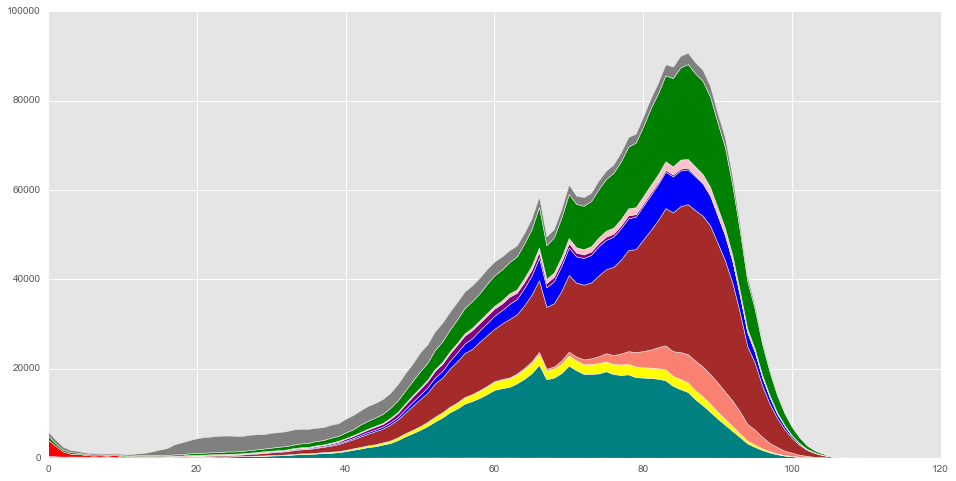

In [225]:
# cmap = plt.get_cmap('CMRmap')
# colors = cmap(np.linspace(0, 1.0, stacked_data_20.shape[-1]))
colors=['gray', 'teal', 'yellow', 'salmon', 'brown', 'blue', 'purple', 'pink', 'orange', 'red', 'green']
plt.stackplot(range(len(stacked_data_20)), stacked_data_20.transpose(), colors=colors)
pass

In [92]:
recode39 = np.genfromtxt('data/DeathRecords/Recode39.csv', delimiter=',', dtype='str')

In [181]:
stacked_df = pd.DataFrame(data=stacked_data_20, index=range(len(stacked_data_20)), columns=recode20)

/Library/Python/2.7/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


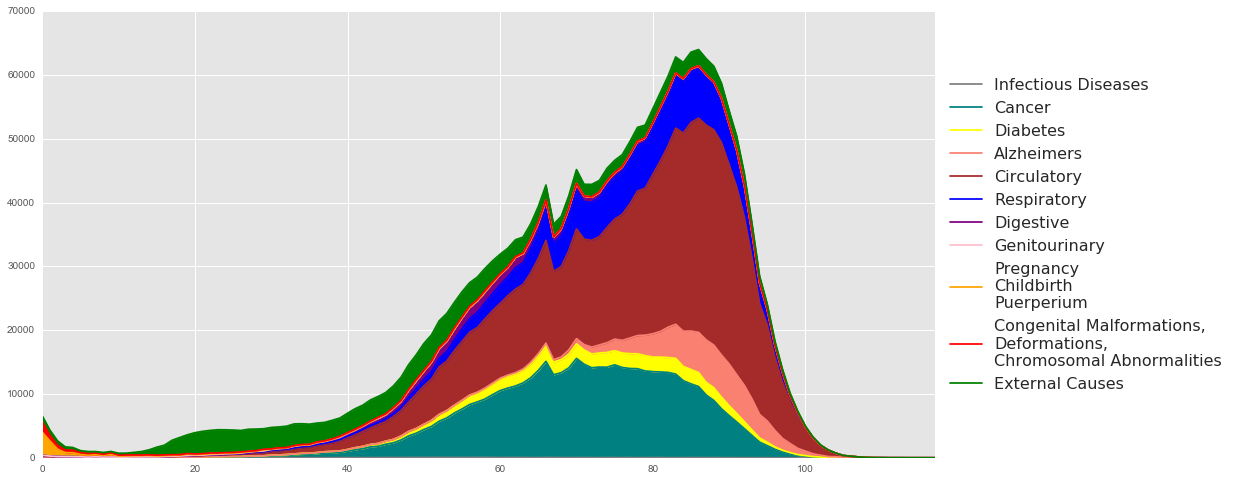

In [226]:
f = plt.figure()
stacked_df.plot.area(ax=f.gca(), colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
# plt.savefig('tmp')
pass

In [163]:
area1 = Area(stacked_df, stack=True, legend=False)
output_file("area.html", title="2014 Mortality Breakdown")
show(row(area1))